In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_set = pd.read_csv('clean_data.csv', header=0)
data_set

,Married,Years_Together,First_Together,End_Year,Religious_Attendance,Interracial_Couple,Age_Diff,Age,P_Age,Education,P_Education,Gender,Household_Income,Ethnicity,P_Ethnicity,Politics,P_Politics,White,Black or African American,American Indian or Alaska Native,Asian Indian,Chinese,Filipino,Japanese,Korean,Vietnamese,Other Asian,Hawaiian,Guamanian,Samoan,Other Pacific Islander,Some other race,school,college,mil,church,vol_org,customer,restaurant,party,other,dating,soc_network,game,chat,org,public,blind_date,vacation,serve_nonint,trip,neighbors,met_online
0,"Yes, I am Married",34.0,1983.0,NaN,Never,no,3.0,55,52.0,Bachelor's degree or higher,Masters degree,Female,"$150,000 to $174,999","White, Non-Hispanic",White,Not Strong Republican,Leans Republican,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,"Yes, I am Married",11.0,2006.0,NaN,Once or twice a month,no,2.0,47,45.0,Bachelor's degree or higher,Associate degree,Male,"$200,000 to $249,999","White, Non-Hispanic",White,Leans Democrat,Leans Democrat,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes
2,"Yes, I am Married",34.0,1983.0,NaN,Once a year or less,no,0.0,59,59.0,Bachelor's degree or higher,Bachelors degree,Female,"$175,000 to $199,999","White, Non-Hispanic",White,Strong Democrat,Strong Democrat,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no
3,"Yes, I am Married",36.0,1981.0,NaN,Once a week,no,1.0,59,60.0,High school,Bachelors degree,Male,"$75,000 to $84,999","White, Non-Hispanic",White,Strong Democrat,Undecided/Independent/Other,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes,no,no,no
4,"Yes, I am Married",51.0,1966.0,NaN,Once a week,no,1.0,66,67.0,High school,"Some college, no degree",Female,"$50,000 to $59,999","White, Non-Hispanic",White,Not Strong Democrat,Leans Republican,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,"Yes, I am Married",2.0,2015.0,NaN,Never,no,2.0,27,29.0,Bachelor's degree or higher,Bachelors degree,Female,"$60,000 to $74,999","White, Non-Hispanic",White,Strong Democrat,Leans Democrat,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes
2920,"No, I am not Married",1.0,2016.0,NaN,A few times a year,no,3.0,24,21.0,Bachelor's degree or higher,Bachelors degree,Male,"$250,000 or more","White, Non-Hispanic",White,Not Strong Republican,Leans Republican,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes
2921,"Yes, I am Married",5.0,2012.0,NaN,A few times a year,yes,2.0,41,39.0,Bachelor's degree or higher,Bachelors degree,Male,"$125,000 to $149,999","White, Non-Hispanic",Black or African American,Not Strong Democrat,Leans Democrat,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes
2922,"No, I am not Married",3.0,2014.0,NaN,Once a year or less,yes,4.0,32,28.0,Bachelor's degree or higher,Masters degree,Male,"$60,000 to $74,999","White, Non-Hispanic",Asian or Pacific Islander,Leans Democrat,Leans Democrat,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes


In [9]:
#split data set into in sample and out-of-sample (OOS) data,
#so that a machine learning model can be built, and we can use the model to classify OOS data
oos_size = int(0.10*data_set.shape[0])
ins_size = data_set.shape[0] - oos_size
data = data_set[:ins_size]
oos_data = data_set[ins_size:]

In [10]:
data.describe(include=[np.number])

,Years_Together,First_Together,End_Year,Age_Diff,Age,P_Age
count,2632.000000,2632.000000,112.000000,2631.000000,2632.000000,2631.000000
mean,23.505699,1993.000000,2005.383929,4.229571,50.457827,50.188521
std,16.932018,17.032734,10.709300,4.891186,16.272332,16.285879
min,0.000000,1939.000000,1973.000000,0.000000,18.000000,17.000000
25%,9.000000,1980.000000,1997.750000,1.000000,37.000000,36.000000
50%,21.000000,1996.000000,2009.000000,3.000000,52.000000,51.000000
75%,36.000000,2007.000000,2014.000000,6.000000,63.000000,63.000000
max,78.000000,2017.000000,2017.000000,45.000000,93.000000,95.000000


In [11]:
pd.set_option('display.max_columns', None)
data.describe(include=['O'])

,Married,Religious_Attendance,Interracial_Couple,Education,P_Education,Gender,Household_Income,Ethnicity,P_Ethnicity,Politics,P_Politics,White,Black or African American,American Indian or Alaska Native,Asian Indian,Chinese,Filipino,Japanese,Korean,Vietnamese,Other Asian,Hawaiian,Guamanian,Samoan,Other Pacific Islander,Some other race,school,college,mil,church,vol_org,customer,restaurant,party,other,dating,soc_network,game,chat,org,public,blind_date,vacation,serve_nonint,trip,neighbors,met_online
count,2632,2632,2613,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2632
unique,2,7,2,4,15,2,21,5,6,7,8,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,"Yes, I am Married",Never,no,Bachelor's degree or higher,HS graduate or GED,Female,"$100,000 to $124,999","White, Non-Hispanic",White,Strong Democrat,Undecided/Independent/Other,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
freq,1856,734,2211,990,611,1318,358,1940,2115,503,754,2217,2387,2535,2610,2586,2611,2613,2619,2622,2615,2618,2625,2625,2623,2571,2293,2364,2515,2416,2426,2414,2055,2324,2499,2436,2543,2567,2548,2570,2484,2481,2539,2552,2570,2541,2348


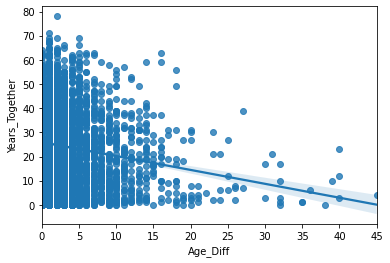

In [12]:
sns.regplot(y=data['Years_Together'], x=data['Age_Diff'])
plt.show()

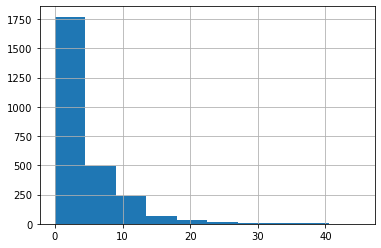

In [13]:
data.Age_Diff.hist()
plt.show()

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

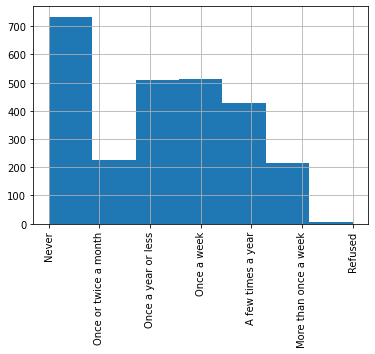

In [14]:
data.Religious_Attendance.hist(bins=7)
plt.xticks(rotation='vertical')